In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf #Auto-Correlation Plots
from statsmodels.graphics.tsaplots import plot_pacf #Partial-Auto Correlation Plots

sns.set()

In [93]:
sa = pd.read_csv('social_media.csv')

In [94]:
sa.shape

(13, 11)

In [95]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13 non-null     int64  
 1   Facebook   13 non-null     float64
 2   Instagram  13 non-null     float64
 3   Pinterest  13 non-null     float64
 4   YouTube    13 non-null     float64
 5   Twitter    13 non-null     float64
 6   LinkedIn   13 non-null     float64
 7   reddit     13 non-null     float64
 8   VKontakte  13 non-null     float64
 9   Tumblr     13 non-null     float64
 10  Other      13 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.2 KB


In [96]:
sa.describe()

,Date,Facebook,Instagram,Pinterest,YouTube,Twitter,LinkedIn,reddit,VKontakte,Tumblr,Other
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,201944.846154,86.631538,3.899231,3.686923,3.460769,2.076154,0.079231,0.071538,0.046154,0.040769,0.006154
std,47.897192,3.234362,2.266743,0.452868,1.151850,0.487246,0.016564,0.026723,0.021031,0.006405,0.005064
min,201905.000000,82.110000,1.170000,2.900000,2.380000,1.250000,0.060000,0.050000,0.030000,0.030000,0.000000
25%,201908.000000,83.800000,1.670000,3.370000,2.640000,1.790000,0.070000,0.060000,0.030000,0.040000,0.000000
50%,201911.000000,86.040000,4.690000,3.760000,3.180000,2.160000,0.080000,0.060000,0.030000,0.040000,0.010000
75%,202002.000000,89.790000,5.030000,3.850000,3.650000,2.430000,0.080000,0.080000,0.070000,0.040000,0.010000
max,202005.000000,91.000000,7.940000,4.590000,6.660000,2.840000,0.120000,0.150000,0.080000,0.050000,0.010000


In [97]:
sa.head()

,Date,Facebook,Instagram,Pinterest,YouTube,Twitter,LinkedIn,reddit,VKontakte,Tumblr,Other
0,201905,91.00,1.67,3.37,2.47,1.25,0.12,0.05,0.03,0.04,0.00
1,201906,90.36,1.17,3.70,2.38,2.16,0.10,0.05,0.03,0.04,0.01
2,201907,89.29,1.49,4.04,2.99,1.95,0.08,0.07,0.03,0.05,0.00
3,201908,89.79,1.41,3.68,3.11,1.79,0.07,0.06,0.03,0.04,0.00
4,201909,88.05,2.44,3.78,3.65,1.82,0.09,0.09,0.03,0.04,0.01


In [98]:
sa.isna().any()

Date         False
Facebook     False
Instagram    False
Pinterest    False
YouTube      False
Twitter      False
LinkedIn     False
reddit       False
VKontakte    False
Tumblr       False
Other        False
dtype: bool

In [99]:
print(sa.Facebook.value_counts(),"\n")
print(sa.Instagram.value_counts(),"\n")
print(sa.Pinterest.value_counts(),"\n")
print(sa.YouTube.value_counts(),"\n")
print(sa.Twitter.value_counts(),"\n")
print(sa.LinkedIn.value_counts(),"\n")
print(sa.reddit.value_counts(),"\n")
print(sa.VKontakte.value_counts(),"\n")
print(sa.Tumblr.value_counts(),"\n")
print(sa.Other.value_counts())

89.79    1
88.05    1
90.36    1
90.06    1
83.56    1
84.68    1
82.11    1
83.80    1
84.94    1
82.53    1
86.04    1
89.29    1
91.00    1
Name: Facebook, dtype: int64 

4.84    2
6.32    1
2.44    1
2.34    1
6.51    1
7.94    1
5.03    1
4.69    1
1.17    1
1.49    1
1.41    1
1.67    1
Name: Instagram, dtype: int64 

3.85    1
3.37    1
3.70    1
4.04    1
3.83    1
3.35    1
2.90    1
3.76    1
4.59    1
4.08    1
3.78    1
3.00    1
3.68    1
Name: Pinterest, dtype: int64 

2.61    1
2.38    1
2.64    1
6.66    1
2.99    1
3.65    1
3.26    1
4.59    1
4.06    1
2.47    1
3.39    1
3.11    1
3.18    1
Name: YouTube, dtype: int64 

1.79    2
2.16    1
2.57    1
1.28    1
1.95    1
2.58    1
2.84    1
2.30    1
2.43    1
1.82    1
2.23    1
1.25    1
Name: Twitter, dtype: int64 

0.07    4
0.08    4
0.06    2
0.10    1
0.09    1
0.12    1
Name: LinkedIn, dtype: int64 

0.06    4
0.05    3
0.07    2
0.08    2
0.15    1
0.09    1
Name: reddit, dtype: int64 

0.03    7
0.07    2
0.

In [41]:
sa.columns

Index(['Date', 'Facebook', 'Instagram', 'Pinterest', 'YouTube', 'Twitter',
       'LinkedIn', 'reddit', 'VKontakte', 'Tumblr', 'Other'],
      dtype='object')

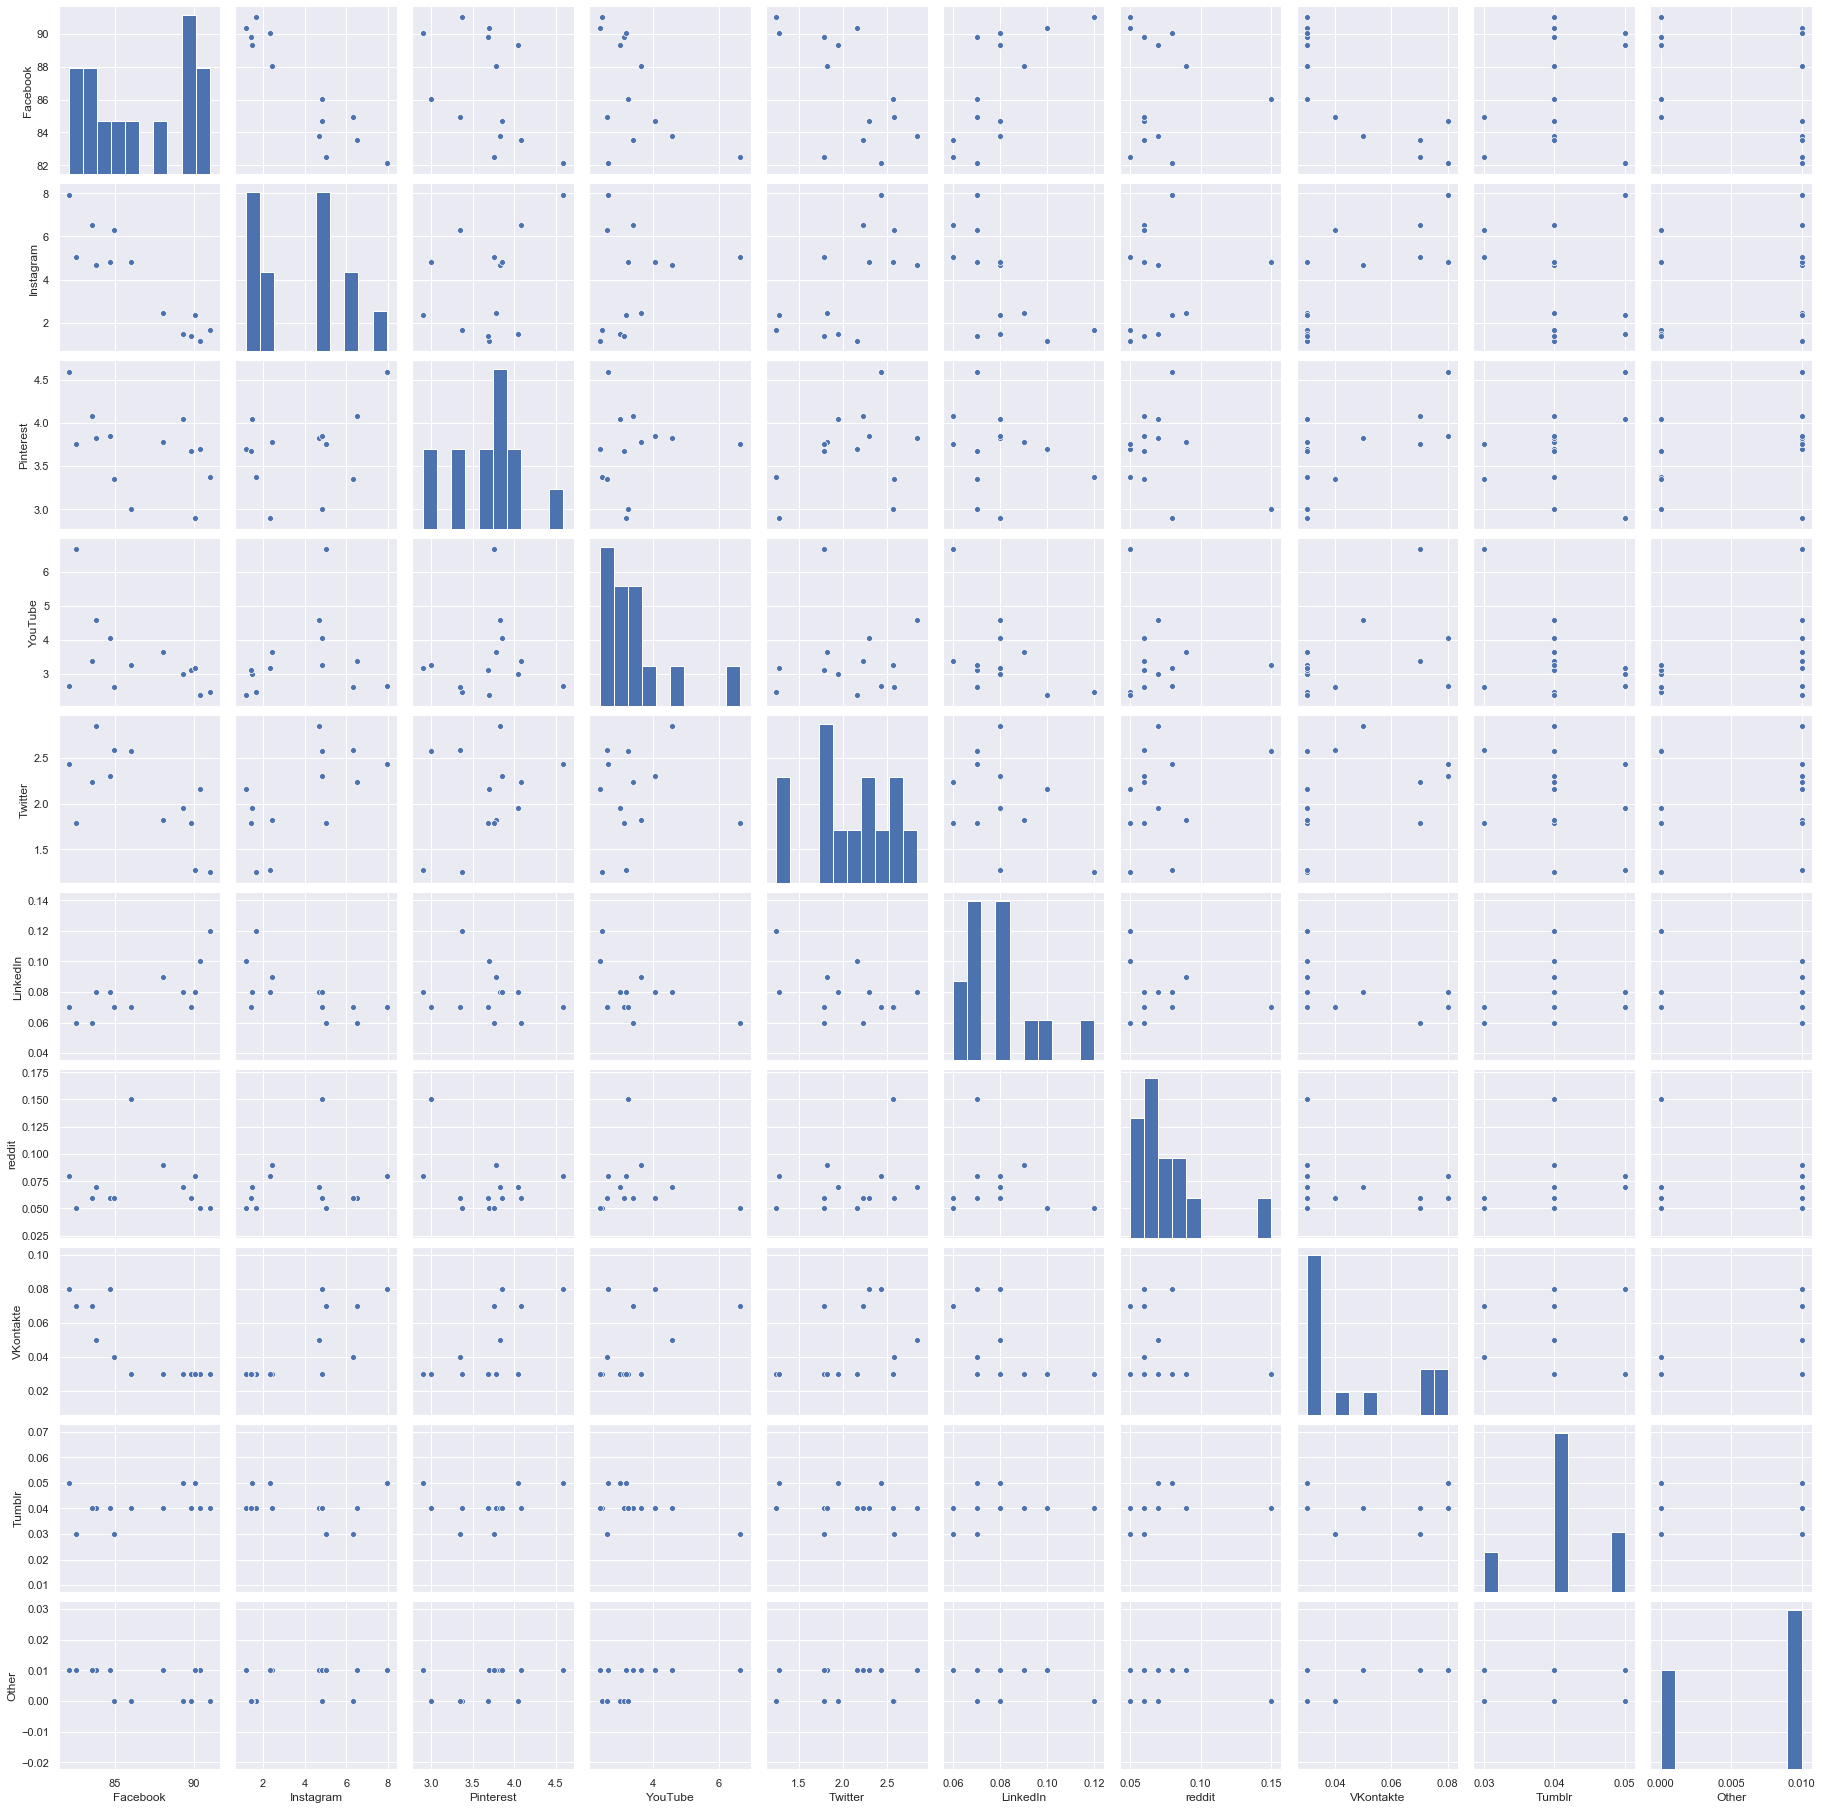

In [43]:
sns.pairplot(sa)

(array([2., 0., 2., 0., 0., 1., 1., 0., 0., 4.]),
 array([195. , 272.3, 349.6, 426.9, 504.2, 581.5, 658.8, 736.1, 813.4,
        890.7, 968. ]),
 <a list of 10 Patch objects>)

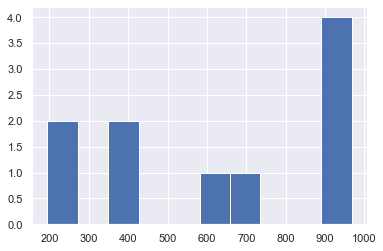

In [102]:
from random import sample
sa = sample(range(1, 1000), 10)
plt.hist(sa)

In [101]:
sns.distplot(sa['Facebook'])

TypeError: list indices must be integers or slices, not str

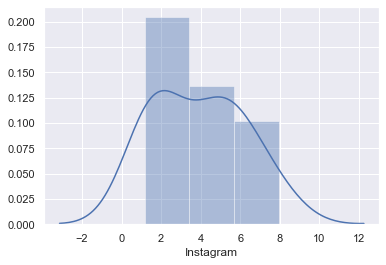

In [45]:
sns.distplot(sa['Instagram'])

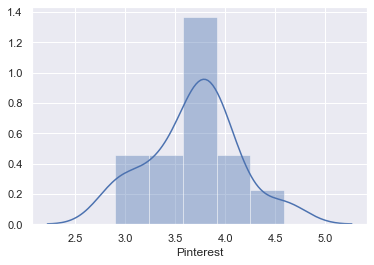

In [46]:
sns.distplot(sa['Pinterest'])

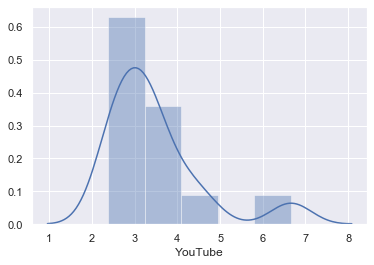

In [48]:
sns.distplot(sa['YouTube'])

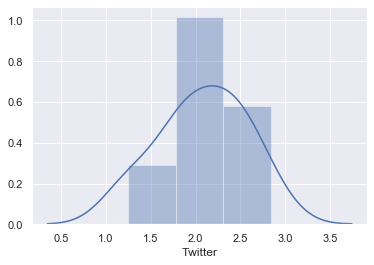

In [49]:
sns.distplot(sa['Twitter'])

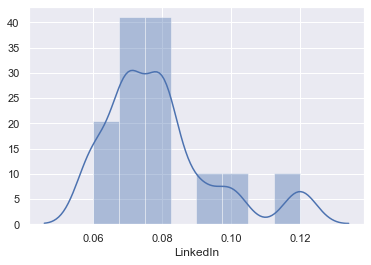

In [50]:
sns.distplot(sa['LinkedIn'])

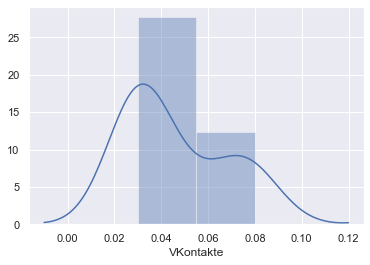

In [51]:
sns.distplot(sa['VKontakte'])

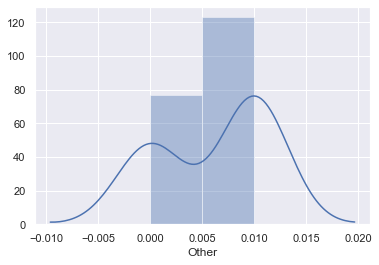

In [53]:
sns.distplot(sa['Other'])

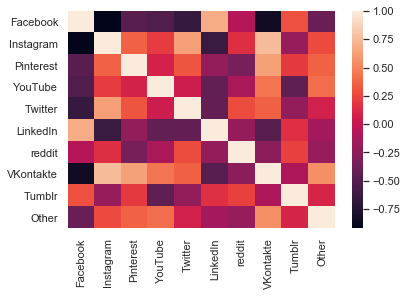

In [58]:
sns.heatmap(sa.corr())